In [5]:
from langchain_openai import ChatOpenAI
import os
from dotenv import load_dotenv
load_dotenv()

True

In [8]:
OPENAI_API_KEY=os.getenv("OPENAI_API_KEY", "")

In [9]:
llm = ChatOpenAI(
    openai_api_key=OPENAI_API_KEY,
    openai_api_base="http://127.0.0.1:1234/v1",
    model="qwen2-7b-instruct@q5_0"
    
)

In [24]:
from langgraph.graph import MessagesState, StateGraph, START, END
from langgraph.checkpoint.memory import InMemorySaver
from langchain.messages import HumanMessage, AIMessage, SystemMessage
from typing import TypedDict, Annotated
from operator import add
import uuid

In [25]:
class State(TypedDict):
    messages:  Annotated[list[str], add]

In [35]:
builder = StateGraph(State)

In [36]:
AGENT_PROMPT=SystemMessage(content="""You are a knowledgeable and reliable AI assistant.
You respond thoughtfully, intelligently, and with clarity.
Your goal is to help users by giving accurate information, well-structured explanations, and practical guidance while maintaining a polite and professional tone.""")

In [37]:
def agent_node(state: State):
    agent_prompt=[AGENT_PROMPT]
    msg = state['messages']
    agent_prompt.extend(msg)
    output = llm.invoke(agent_prompt)
    return {"messages": [output]}

In [38]:
builder.add_node("agent_node", agent_node)

builder.add_edge(START, "agent_node")
builder.add_edge("agent_node", END)

In [39]:
# Specify a checkpointer
checkpointer = InMemorySaver()

# Compile the graph with the checkpointer
graph = builder.compile(checkpointer=checkpointer)

# Define a config with a thread ID.
thread_id = uuid.uuid4()
config = {"configurable": {"thread_id": thread_id}}

# Invoke the graph
# graph.invoke({"url": "https://www.example.com"}, config)

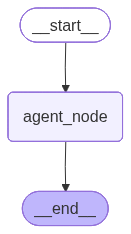

In [40]:
graph

In [41]:
graph.invoke({"messages": [HumanMessage(content="Hello how are you?")]}, config)

{'messages': [HumanMessage(content='Hello how are you?', additional_kwargs={}, response_metadata={}),
  AIMessage(content="Hello! As an AI, I don't have feelings in the human sense, but I'm functioning and ready to assist you with any questions or tasks you might have. How can I help you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 66, 'total_tokens': 108, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_provider': 'openai', 'model_name': 'qwen2-7b-instruct@q5_0', 'system_fingerprint': 'qwen2-7b-instruct@q5_0', 'id': 'chatcmpl-hjxv64p4lsp22e058nqx0l', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019b79a4-108b-7a52-ae06-528bed04b203-0', usage_metadata={'input_tokens': 66, 'output_tokens': 42, 'total_tokens': 108, 'input_token_details': {}, 'output_token_details': {}})]}

In [44]:
for i in graph.get_state_history(config=config):
    print(i)

StateSnapshot(values={'messages': [HumanMessage(content='Hello how are you?', additional_kwargs={}, response_metadata={}), AIMessage(content="Hello! As an AI, I don't have feelings in the human sense, but I'm functioning and ready to assist you with any questions or tasks you might have. How can I help you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 66, 'total_tokens': 108, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_provider': 'openai', 'model_name': 'qwen2-7b-instruct@q5_0', 'system_fingerprint': 'qwen2-7b-instruct@q5_0', 'id': 'chatcmpl-hjxv64p4lsp22e058nqx0l', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019b79a4-108b-7a52-ae06-528bed04b203-0', usage_metadata={'input_tokens': 66, 'output_tokens': 42, 'total_tokens': 108, 'input_token_details': {}, 'output_token_details': {}})]}, next=(), config={'configurable': {'thread_id': '0f42d1b6-fcd5-43ce-b069-2b8075cfef61',

In [51]:
graph.invoke({"messages": [HumanMessage(content="Did I ask you about virat kohli")]}, config)

{'messages': [HumanMessage(content='Hello how are you?', additional_kwargs={}, response_metadata={}),
  AIMessage(content="Hello! As an AI, I don't have feelings in the human sense, but I'm functioning and ready to assist you with any questions or tasks you might have. How can I help you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 66, 'total_tokens': 108, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_provider': 'openai', 'model_name': 'qwen2-7b-instruct@q5_0', 'system_fingerprint': 'qwen2-7b-instruct@q5_0', 'id': 'chatcmpl-hjxv64p4lsp22e058nqx0l', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019b79a4-108b-7a52-ae06-528bed04b203-0', usage_metadata={'input_tokens': 66, 'output_tokens': 42, 'total_tokens': 108, 'input_token_details': {}, 'output_token_details': {}}),
  HumanMessage(content='what are you doing', additional_kwargs={}, response_metadata={}),
  AIMessage(conte

In [1]:
from datetime import timedelta, datetime
from zoneinfo import ZoneInfo

IST = ZoneInfo("Asia/Kolkata")

In [2]:
datetime.now()

datetime.datetime(2026, 1, 2, 18, 26, 3, 759579)

In [3]:
datetime.now(IST)

datetime.datetime(2026, 1, 2, 18, 26, 14, 130854, tzinfo=zoneinfo.ZoneInfo(key='Asia/Kolkata'))